In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


Matplotlib is building the font cache; this may take a moment.


In [2]:
import os

data = pd.read_csv(r"E:\Prasoon\Coding\AI_ML\PROJECT_2\DATASET\Algerian_forest_fires_cleaned_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
data['Classes']=np.where(data['Classes'].str.contains("not fire"),0,1)
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
data=data.drop(['day','month','year','Region'],axis=1)
data.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [10]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


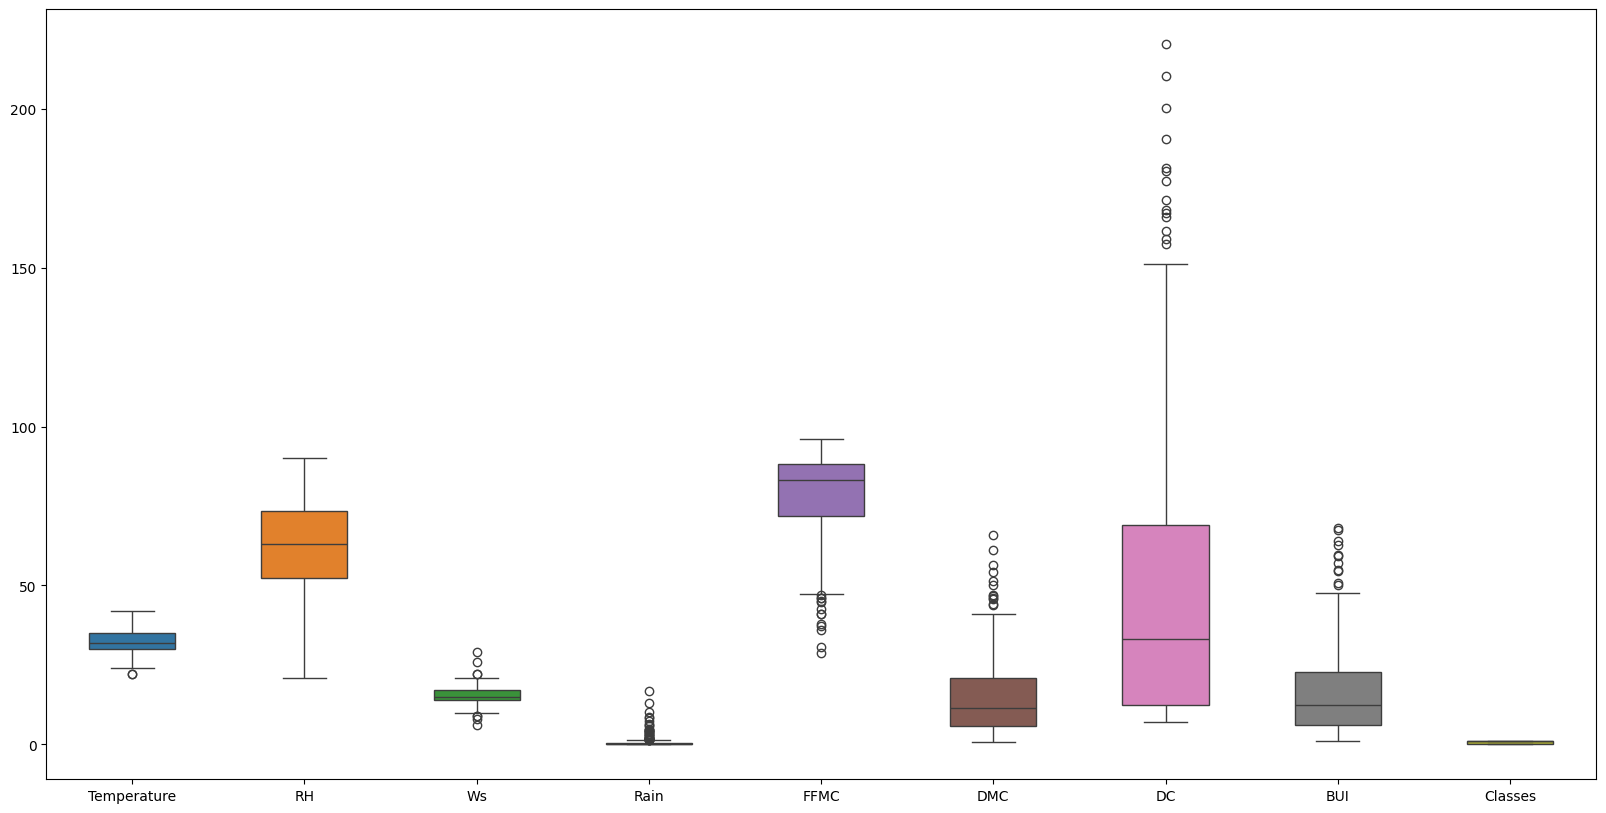

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

# Correcting the code by removing 'fillersize' and adjusting valid parameters
sns.boxplot(data=data, width=0.5, ax=ax)

plt.show()

In [12]:
data['Ws'] = data['Ws'].replace(0,data['Ws'].mean)
data['DMC'] = data['DMC'].replace(0,data['DMC'].mean)
data['DC'] = data['DC'].replace(0,data['DC'].mean)
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean)
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean)
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,BUI,Classes
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,16.690535,0.563786
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,14.228421,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,12.400000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,22.650000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,68.000000,1.000000


In [13]:
X = data.drop(columns=['Classes'])
y = data['Classes']

In [14]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,<bound method Series.mean of 0 1.3\n1 ...,1.7,<bound method Series.mean of 0 0.5\n1 ...
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,<bound method Series.mean of 0 0.5\n1 ...
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [17]:
print(y.dtype)

int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [19]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])
y_train.shape, y_test.shape

((182,), (61,))

In [20]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,BUI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.447959
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.333027
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,0.023680
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.308258
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.606527
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.984222
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.951157
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,1.000000


<Axes: >

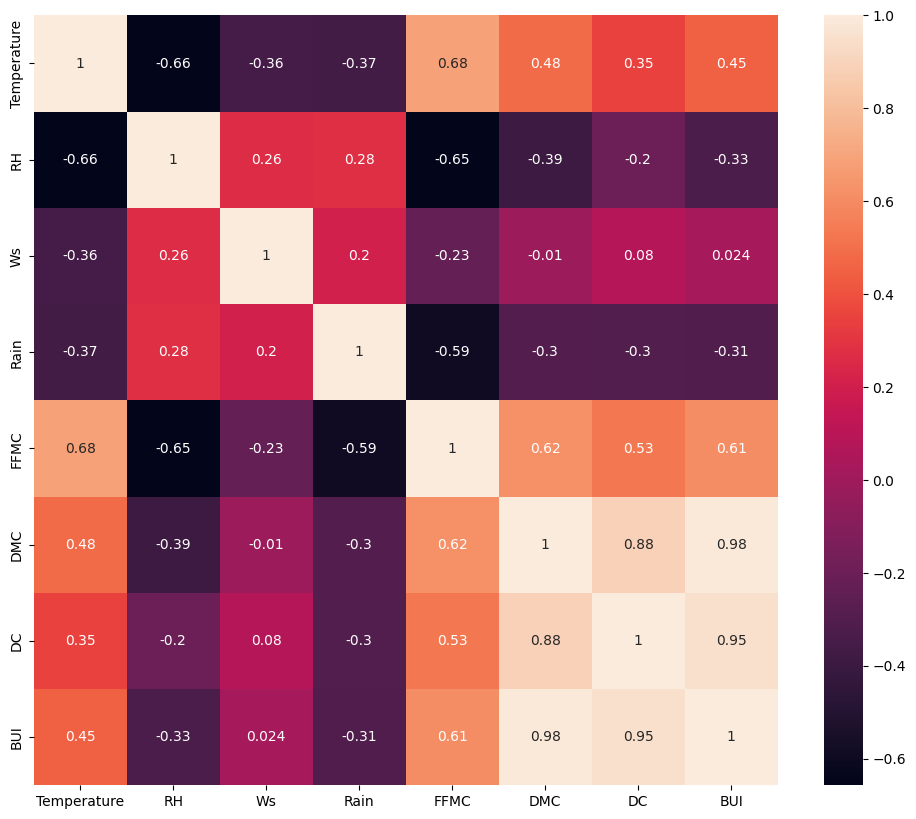

In [21]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features=correlation(X_train,0.88)
corr_features

{'BUI', 'DC'}

In [24]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 6), (61, 6))

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
from pathlib import Path
file = open(r'E:\Prasoon\Coding\AI_ML\PROJECT_2\MODEL\standardScaler.pkl', 'wb')
pickle.dump(scaler, file)
file.close()



X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, -0.31830288,  0.86103378,
         0.82966632],
       [ 0.47735924,  0.64088224, -0.54024971,  2.59876399, -0.96914461,
        -0.93132657],
       [ 1.81809043, -1.8394432 ,  0.50576569, -0.36388205,  1.07841129,
         0.14874907],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, -0.36388205,  0.25798649,
        -0.72000743],
       [-0.32707948,  0.44506707, -0.54024971, -0.36388205,  0.49640054,
        -0.24258268],
       [-0.05893324, -0.86036737,  0.85443749, -0.36388205,  0.92414338,
         2.26976718]], shape=(182, 6))

Text(0.5, 1.0, 'X_train After Scaling')

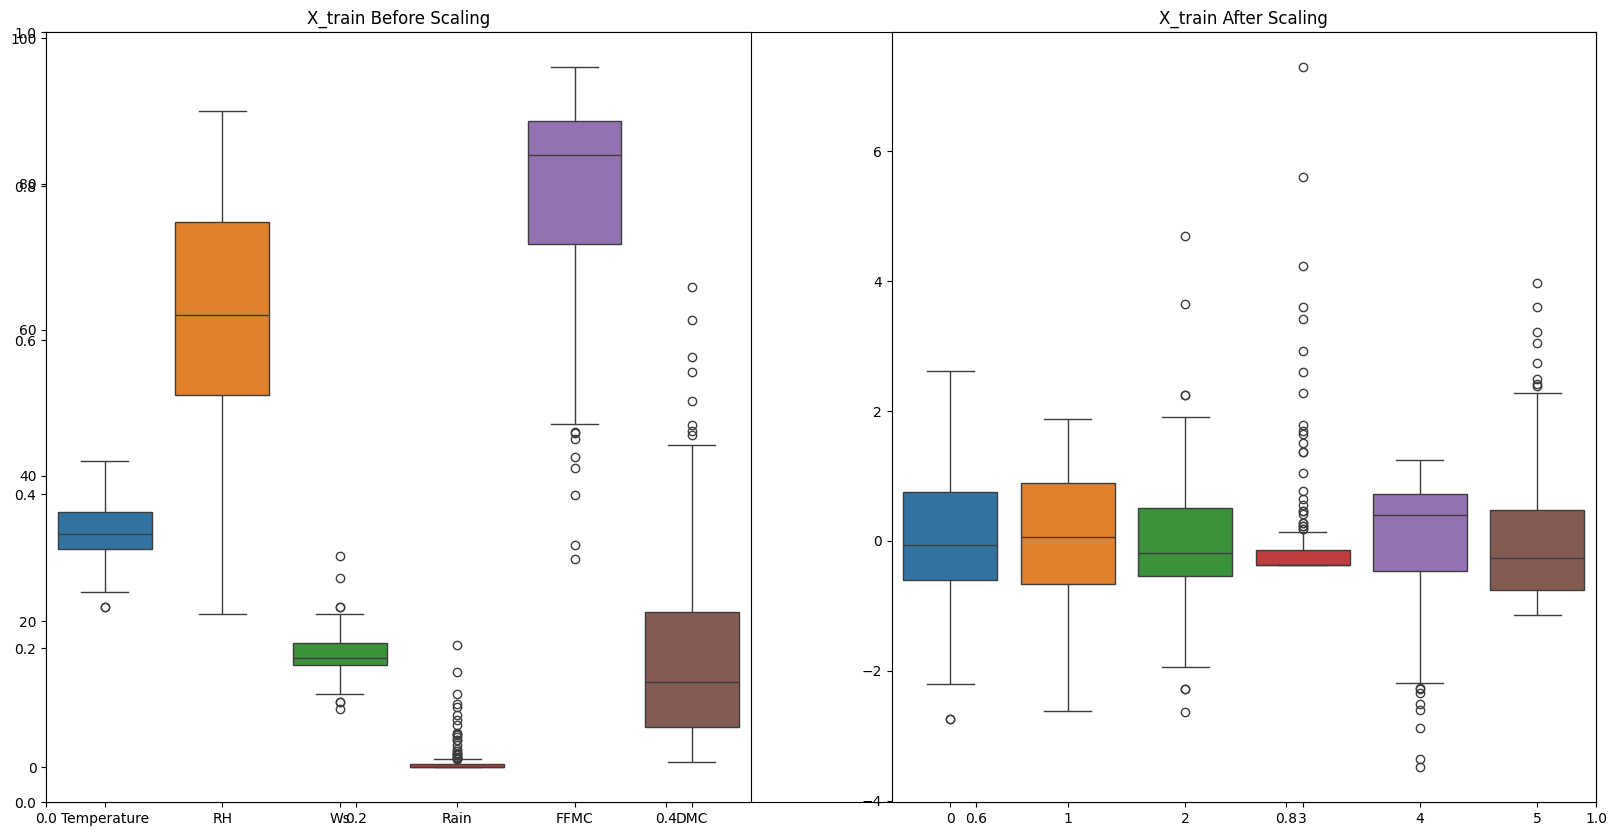

In [30]:
plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [32]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
#Hyperparameter tuning
#gridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3, 3, 7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}

In [34]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
                   param_grid = parameters,
                   scoring="accuracy",
                   cv=10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [36]:
clf.best_params_,clf.best_score_


({'C': np.float64(10.0), 'penalty': 'l2', 'solver': 'lbfgs'},
 np.float64(0.9666666666666666))

In [37]:
y_pred = clf.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[26,  0],
       [35,  0]])

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

np.float64(0.4262295081967213)

In [39]:
Precision = true_positive / (true_positive + false_positive)
Precision

np.float64(1.0)

In [40]:
Recall = true_positive / (true_positive + false_negative)
F1_score = 2*(Recall * Precision)/(Recall + Precision)
Recall,F1_score

(np.float64(0.4262295081967213), np.float64(0.5977011494252873))

In [44]:
import pickle
file = open(r'E:\Prasoon\Coding\AI_ML\PROJECT_2\MODEL\modelForPrediction.pkl', 'wb')
pickle.dump(log_reg,  file)
file.close()

LINEAR REGRESSION MODEL


Mean absolute error 0.2831043547684703
R2 Score 0.5580488380285582


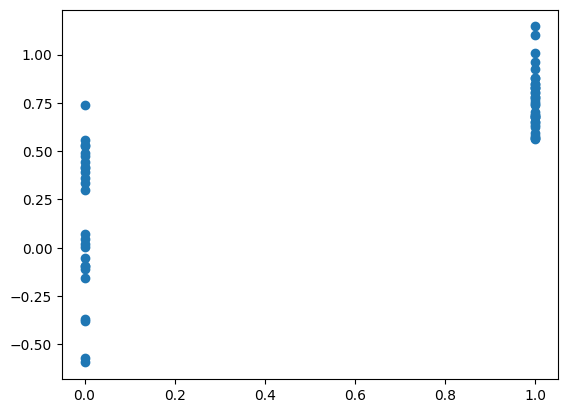

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)